![bees](bees.jpg)

# Which plants are better for bees: native or non-native?

## 📖 Background
You work for the local government environment agency and have taken on a project about creating pollinator bee-friendly spaces. You can use both native and non-native plants to create these spaces and therefore need to ensure that you use the correct plants to optimize the environment for these bees.

The team has collected data on native and non-native plants and their effects on pollinator bees. Your task will be to analyze this data and provide recommendations on which plants create an optimized environment for pollinator bees.

## 💾 The Data
You have assembled information on the plants and bees research in a file called `plants_and_bees.csv`. Each row represents a sample that was taken from a patch of land where the plant species were being studied.

| Column     | Description              |
|------------|--------------------------|
| `sample_id` | The ID number of the sample taken. |
| `bees_num` | The total number of bee individuals in the sample. |
| `date` | Date the sample was taken. |
| `season` | Season during sample collection ("early.season" or "late.season"). |
| `site` | Name of collection site. |
| `native_or_non` | Whether the sample was from a native or non-native plot. |
| `sampling` | The sampling method. |
| `plant_species` | The name of the plant species the sample was taken from. None indicates the sample was taken from the air. |
| `time` | The time the sample was taken. |
| `bee_species` | The bee species in the sample. |
| `sex` | The gender of the bee species. |
| `specialized_on` | The plant genus the bee species preferred. |
| `parasitic` | Whether or not the bee is parasitic (0:no, 1:yes). |
| `nesting` | The bees nesting method. |
| `status` | The status of the bee species. |
| `nonnative_bee` | Whether the bee species is native or not (0:no, 1:yes). |

[Source](https://datadryad.org/stash/dataset/doi%253A10.5061%252Fdryad.pzgmsbcj8) (data has been modified)

## 💪 Challenge
Provide your agency with a report that covers the following:
* Which plants are preferred by native vs non-native bee species?
* A visualization of the distribution of bee and plant species across one of the samples.
* Select the top three plant species you would recommend to the agency to support native bees.

# Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

In [34]:
data = pd.read_csv("data/plants_and_bees.csv", parse_dates = ['date'])
print(data.shape)
data.head()

(1250, 16)


,sample_id,bees_num,date,season,site,native_or_non,sampling,plant_species,time,bee_species,sex,specialized_on,parasitic,nesting,status,nonnative_bee
0,17400,23,2017-04-18,early.season,A,native,pan traps,None,935,Augochlorella aurata,f,NaN,0.0,ground,NaN,0.0
1,17400,23,2017-04-18,early.season,A,native,pan traps,None,935,Agapostemon texanus,f,NaN,0.0,ground,NaN,0.0
2,17400,23,2017-04-18,early.season,A,native,pan traps,None,935,Augochlorella aurata,f,NaN,0.0,ground,NaN,0.0
3,17400,23,2017-04-18,early.season,A,native,pan traps,None,935,Andrena carlini,f,NaN,0.0,ground,NaN,0.0
4,17400,23,2017-04-18,early.season,A,native,pan traps,None,935,Andrena perplexa,m,NaN,0.0,ground,NaN,0.0


# Data processing

In [176]:
df = data.copy()

original_shape = df.shape[0]
df = df.drop_duplicates()
print(f"Dropped {original_shape - df.shape[0]} rows")

Dropped 599 rows


# Q1. Which plants are preferred by native vs non-native bee species?

In [159]:
native_df = df[df['nonnative_bee'] == 0]
non_native_df = df[df['nonnative_bee'] == 1]

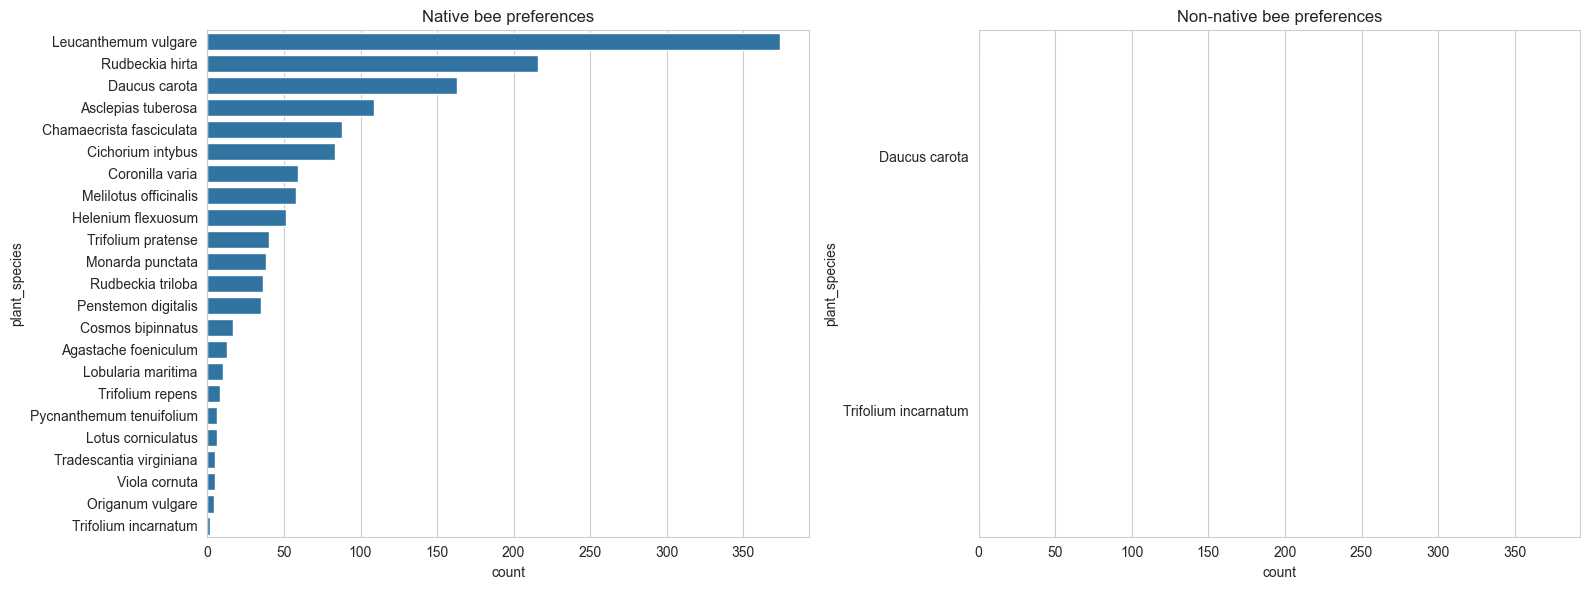

In [169]:
fig, axs = plt.subplots(1, 2, figsize = (16, 6), sharex=True)

native_preferred = native_df.groupby("plant_species")['bees_num'].sum().sort_values(ascending = False).reset_index()
native_preferred.columns = ['plant_species', 'count']
native_preferred = native_preferred[native_preferred['plant_species'] != "None"]
sns.barplot(data = native_preferred, y = 'plant_species', x = 'count', ax = axs[0])
axs[0].set_title(f"Native bee preferences")

non_native_preferred = non_native_df.groupby("plant_species")['bees_num'].count().sort_values(ascending = False).reset_index()
non_native_preferred.columns = ['plant_species', 'count']
non_native_preferred = non_native_preferred[non_native_preferred['plant_species'] != "None"]
sns.barplot(data = non_native_preferred, y = 'plant_species', x = 'count', ax = axs[1])
axs[1].set_title(f"Non-native bee preferences")

plt.tight_layout()

# Q2. A visualization of the distribution of bee and plant species across one of the samples.

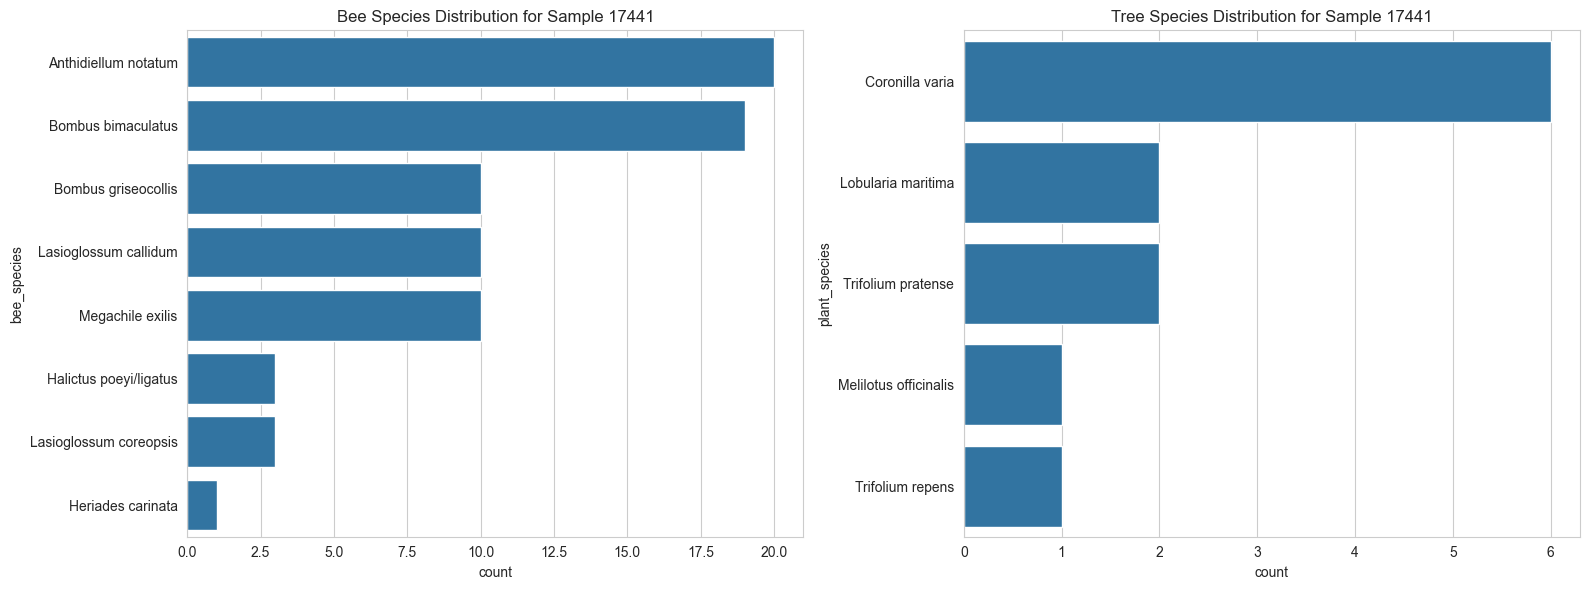

In [170]:
fig, axs = plt.subplots(1, 2, figsize = (16, 6))
sample_id = 17441
sample_df = df[df['sample_id'] == sample_id]
sample_bees_df = sample_df.groupby('bee_species')['bees_num'].sum().sort_values(ascending = False).reset_index()
sample_bees_df.columns = ['bee_species', 'count']
sns.barplot(data = sample_bees_df, y = 'bee_species', x = 'count', ax = axs[0])
axs[0].set_title(f"Bee Species Distribution for Sample {sample_id}")

sample_plants_df = sample_df.groupby('plant_species')['sample_id'].count().sort_values(ascending = False).reset_index()
sample_plants_df.columns = ['plant_species', 'count']
sample_plants_df
sns.barplot(data = sample_plants_df, y = 'plant_species', x = 'count', ax = axs[1])
axs[1].set_title(f"Tree Species Distribution for Sample {sample_id}")
plt.tight_layout()

# Q3. Select the top three plant species you would recommend to the agency to support native bees.

In [175]:
print("The agency should select the following three plant species:\n")
for i, row in native_preferred.iterrows():
    print(f"- {row['plant_species']}")
    if i == 3:
        break

The agency should select the following three plant species:

- Leucanthemum vulgare
- Rudbeckia hirta
- Daucus carota
